# SED Processing of CIGALE SED Decomposition fits
This script is used to explore and proccess some of the outputs from the fits files generated by the CIGALE SED decomposition. We intend for this to explore the AGN contribution with a more robust set of tools to see how AGN contamination effects UVJ and other diagnostics.

In [95]:
# Import all required packages
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath
import seaborn as sns

# refresh

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
# The aim of this is to see how the SEDs of the galaxies are
# to this end what we do is read in some of the fits files
# Begin by importing just one of the fits files
gal_name= '9367_best_model.fits'
galaxy_path = os.path.join('datasets\student_fits_files\cdfs_best_models_fits', gal_name)
    
# Open the fits files <- needs to be different for CAT vs Fits files
with fits.open(galaxy_path) as data:
    df = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())

In [97]:
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')


pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

In [98]:
df # We recall wavelength is in nanometers, we would like to immediately convert this to angstroms




df['wavelength'] = df['wavelength']*10

# For plotting reasons, convert to Janksys
# We are already in mJanksys
df['Snu'] = df['Fnu']*10**-3

# Converting into F_lambda
df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2)

In [99]:
df

,wavelength,Fnu,L_lambda_total,stellar.old,stellar.young,nebular.absorption_old,nebular.absorption_young,nebular.lines_old,nebular.lines_young,nebular.continuum_old,...,attenuation.nebular.lines_young,attenuation.nebular.continuum_old,attenuation.nebular.continuum_young,dust,agn.SKIRTOR2016_torus,agn.SKIRTOR2016_polar_dust,agn.SKIRTOR2016_disk,igm,Snu,Flambda
0,1.902700e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
1,2.184592e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
2,2.508247e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
3,2.879853e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
4,3.306514e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,1.850846e+10,0.000016,6.134977e+18,0.0,0.0,0.0,0.0,0.0,0.0,5.923701e+16,...,-0.0,-7.814515e+06,-8.015084e+08,0.0,0.0,0.0,0.0,0.0,1.634406e-08,1.431333e-33
4771,1.859389e+10,0.000016,6.081121e+18,0.0,0.0,0.0,0.0,0.0,0.0,5.871700e+16,...,-0.0,-7.688700e+06,-7.886039e+08,0.0,0.0,0.0,0.0,0.0,1.635048e-08,1.418768e-33
4772,1.867972e+10,0.000016,6.027728e+18,0.0,0.0,0.0,0.0,0.0,0.0,5.820146e+16,...,-0.0,-7.564892e+06,-7.759054e+08,0.0,0.0,0.0,0.0,0.0,1.635689e-08,1.406311e-33
4773,1.885256e+10,0.000016,5.922350e+18,0.0,0.0,0.0,0.0,0.0,0.0,5.718397e+16,...,-0.0,-7.323233e+06,-7.511193e+08,0.0,0.0,0.0,0.0,0.0,1.636972e-08,1.381726e-33


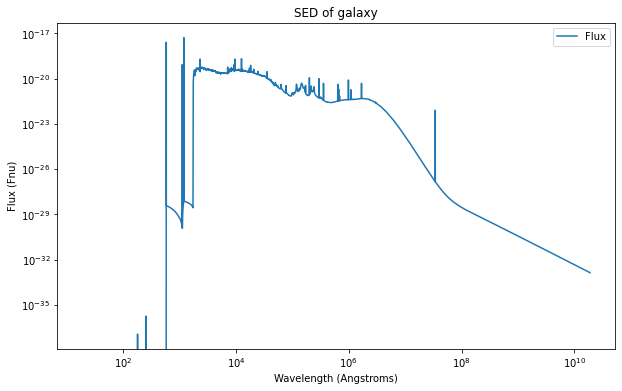

In [100]:

# Only plot between 10^3 and 10^5

# Do a logplot of the lines 
plt.figure(figsize=(10, 6))
plt.loglog(df['wavelength'], df['Flambda'], label='Flux')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Fnu)')
# Change the limits from 10^3 to 10^5


#plt.ylim(1e-2, 1e2)


plt.title('SED of galaxy')
plt.legend()
plt.show()


In [101]:
# We can see that this kind of works. What we would now like to do, is extend this idea to a few more galaxies. Instead
# of one. We can read in say n number of galaxies, convert to what we use and then plot them all together
# We will be able to see that these galaxies are not restframed, we need to use the exported zpk from a previous file 
# to restframe them.

# Reading in the file containing the id's plus, filed, plus redshift
queiscent_transitions = pd.read_csv('outputs\quiescent_transition_ids.csv')

In [102]:
queiscent_transitions

# we can use something like this
# wavelengths = wavelengths / (1 + float(selected_redshifts[z_id]))

,id,zpk,field
0,22468,1.6739,CDFS
1,16807,1.5228,CDFS
2,11281,1.5864,CDFS
3,10413,1.5003,CDFS
4,13143,1.4925,CDFS
...,...,...,...
434,13883,0.8058,UDS
435,1887,0.4364,UDS
436,17475,1.0974,UDS
437,19012,0.4129,UDS


In [103]:
# now doing this lets select 5 galaxies, and plot their SEDS

# We will use the same code as above, but we will put it in a function, and then call this function for each of the galaxies
# that we have selected

def get_n_seds(n, restframe=False, all=False):
    # Select n galaxies
    
    df_list = []
    names = []
    redshifts = []
    if all==False:
        selected_galaxies = queiscent_transitions.sample(n)
    else: 
        selected_galaxies = queiscent_transitions
        
    # Reset the index
    selected_galaxies = selected_galaxies.reset_index(drop=True)
    
    # name 
    gal_name = selected_galaxies['id'].astype(str)
    
    # field
    gal_field = selected_galaxies['field'].astype(str)
    
    
    names = gal_field + '_' + gal_name
    gal_redshift = selected_galaxies['zpk'].astype(float)

    # Now we will read in the fits files for these galaxies

    for i in range(len(selected_galaxies)):
        path = 'datasets\student_fits_files\\'+ str(gal_field[i]).lower() +'_best_models_fits\\'
        name = str(gal_name[i])+'_best_model.fits'

        galaxy_path = os.path.join(path, name)
        with fits.open(galaxy_path) as data:
            df = pd.DataFrame(np.array(data[1].data).byteswap().newbyteorder())
        
        # Convert to angstroms
        df['wavelength'] = df['wavelength']*10

        if restframe:
            df['Snu'] = df['Fnu']*10**-3 # milliJanksys to Janksys <- J = ergs/(s*(cm^2)*(s^-1))
            # F_nu currently has a frequency dependence, convert to nuFnu by multiplying the the frequency associated
            # with the wavelength, as we are in angstroms, we can use the formula c = f*lambda
            
            
            # This should prevent any issues, but check
            freq = (3*10**18)/df['wavelength'] # in Hz
            # multiply the Snu * nu to get nuSnu
            df['nuSnu'] = df['Snu']*freq
            # Restframe the values of wavelength
            df['wavelength'] = df['wavelength'] / (1 + gal_redshift[i]) # we redshift the values of of wavelength
            # now calculate a new frequency, based on the new wavelength
            freq = (3*10**18)/df['wavelength'] # in Hz
            # divide the nuSnu by the new frequency to get the restframed values
            df['Snu'] = df['nuSnu']/freq
            
            # Convert flux values
            df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2) # S_nu to F_lambda <- angstroms 
            
        else:
            # Convert flux values
            df['Snu'] = df['Fnu']*10**-3 # milliJanksys to Janksys <- J = ergs/(s*(cm^2)*(s^-1))
            df['Flambda'] = df['Snu']*(3*10**-5)/(df['wavelength']**2) # S_nu to F_lambda <- angstroms 
            
        
            
            
        redshift_Val = gal_redshift[i]
        redshifts.append(redshift_Val)        
        
        

        
        # For simplicity, just create some extra columns
        df['lambda (Angstroms)'] = df['wavelength']
        df['Total Flux (erg/s/cm^2/Angstrom)'] = df['Flambda']
        
        
        
        df_list.append(df)
        
        
        plt.loglog(df['wavelength'], df['Flambda'])
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Flux (Fnu)')
    #plt.xlim(1e3, 1e5)
    plt.ylim(1e-30, 1e-2)
    plt.title('SED of galaxies')
    plt.legend()
    plt.show()
    
    print(len(df_list))
    
    return df_list, names, redshifts

In [104]:
#get_n_seds(100, restframe=True)

We can see by using this code that we can read in the 'best fit' models of these SEDS and rest frame them using their zpk value. Now we can extend this code as required

No handles with labels found to put in legend.


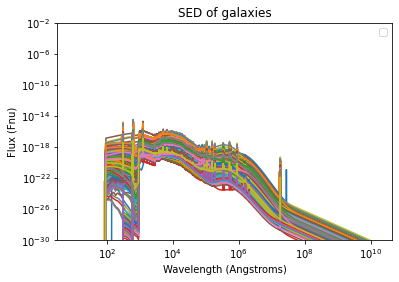

439


In [105]:
best_fit_seds, names, redshifts = get_n_seds(100, restframe=True, all=True)



In [106]:
# we will use astSED to generate the colours right here



In [107]:
len(best_fit_seds)

439

In [108]:
len(names)
#names

439

In [109]:
# For simplicity, for each of the names, have a dictionary entry with the associated dataframe
# This will make it easier to access the dataframes
# We will also convert the names to a list
names = names.tolist()


In [110]:
# names

# # setting up the dictionary
# best_fit_seds_dict = dict(zip(names, best_fit_seds))


In [111]:
# best_fit_seds_dict

In [112]:
# Seperately we would like to just acces best_fit_seds
# best_fit_seds


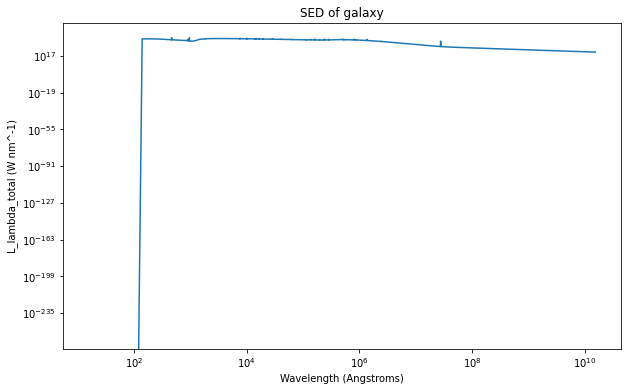

In [113]:
# Lets just explore the first restframed galaxy with everything plotted
sed_0 = best_fit_seds[0]


plt.figure(figsize=(10, 6))
plt.loglog(sed_0['wavelength'], sed_0['L_lambda_total'], label='')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('L_lambda_total (W nm^-1)')
#plt.ylim(1e-30, 1e-2)
plt.title('SED of galaxy')
plt.show()

Happily we see the best fit SEDS are correct in terms of their restframed shape and position. This means that these SEDS can therefore be used. But this is not all as we also need to explore the other ontributions
which are shown in the dataframe
best_fit_seds

In [114]:
# we are going to try and plot the SEDs to see the differences, and export an ID, and UVJ colours (recalling UVJ are inherently restframed)
# We will use a similar techinques as previous scripts have done
# Using our previous technique


# Get one de-redshifted template
# We will use the selection of them
best_fit_seds

[        wavelength       Fnu  L_lambda_total  stellar.old  stellar.young  \
 0     1.529788e+01  0.000000    0.000000e+00          0.0            0.0   
 1     1.756432e+01  0.000000    0.000000e+00          0.0            0.0   
 2     2.016653e+01  0.000000    0.000000e+00          0.0            0.0   
 3     2.315428e+01  0.000000    0.000000e+00          0.0            0.0   
 4     2.658467e+01  0.000000    0.000000e+00          0.0            0.0   
 ...            ...       ...             ...          ...            ...   
 4770  1.488097e+10  0.000399    6.574869e+20          0.0            0.0   
 4771  1.494965e+10  0.000399    6.517152e+20          0.0            0.0   
 4772  1.501866e+10  0.000400    6.459931e+20          0.0            0.0   
 4773  1.515763e+10  0.000400    6.346997e+20          0.0            0.0   
 4774  1.529788e+10  0.000400    6.236037e+20          0.0            0.0   
 
       nebular.absorption_old  nebular.absorption_young  nebular.lines_old

In [115]:
# Now we would like to, for each of the templates calculate a colour
# -  now we can go and have a look, creating colours are required

best_fit_seds[0]


,wavelength,Fnu,L_lambda_total,stellar.old,stellar.young,nebular.absorption_old,nebular.absorption_young,nebular.lines_old,nebular.lines_young,nebular.continuum_old,...,dust,agn.SKIRTOR2016_torus,agn.SKIRTOR2016_polar_dust,agn.SKIRTOR2016_disk,igm,Snu,nuSnu,Flambda,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom)
0,1.529788e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,1.529788e+01,0.000000e+00
1,1.756432e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,1.756432e+01,0.000000e+00
2,2.016653e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,2.016653e+01,0.000000e+00
3,2.315428e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,2.315428e+01,0.000000e+00
4,2.658467e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,2.658467e+01,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,1.488097e+10,0.000399,6.574869e+20,0.0,0.0,0.0,0.0,0.0,0.0,2.722950e+18,...,0.0,0.0,0.0,0.0,0.0,1.493214e-07,30.103155,2.022930e-32,1.488097e+10,2.022930e-32
4771,1.494965e+10,0.000399,6.517152e+20,0.0,0.0,0.0,0.0,0.0,0.0,2.699046e+18,...,0.0,0.0,0.0,0.0,0.0,1.493800e-07,29.976619,2.005171e-32,1.494965e+10,2.005171e-32
4772,1.501866e+10,0.000400,6.459931e+20,0.0,0.0,0.0,0.0,0.0,0.0,2.675349e+18,...,0.0,0.0,0.0,0.0,0.0,1.494386e-07,29.850579,1.987566e-32,1.501866e+10,1.987566e-32
4773,1.515763e+10,0.000400,6.346997e+20,0.0,0.0,0.0,0.0,0.0,0.0,2.628577e+18,...,0.0,0.0,0.0,0.0,0.0,1.495558e-07,29.600100,1.952819e-32,1.515763e+10,1.952819e-32


In [116]:
# for each of the entries, we will create a list of the ID, and the UVJ colours, remembering these are rest framed

export_df = pd.DataFrame(columns=['ID', 'UV', 'VJ'])


In [117]:
export_df

,ID,UV,VJ


In [118]:
# Create the colours cigale outputs
best_fit_seds[0]

,wavelength,Fnu,L_lambda_total,stellar.old,stellar.young,nebular.absorption_old,nebular.absorption_young,nebular.lines_old,nebular.lines_young,nebular.continuum_old,...,dust,agn.SKIRTOR2016_torus,agn.SKIRTOR2016_polar_dust,agn.SKIRTOR2016_disk,igm,Snu,nuSnu,Flambda,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom)
0,1.529788e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,1.529788e+01,0.000000e+00
1,1.756432e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,1.756432e+01,0.000000e+00
2,2.016653e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,2.016653e+01,0.000000e+00
3,2.315428e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,2.315428e+01,0.000000e+00
4,2.658467e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.0,0.000000e+00,0.000000,0.000000e+00,2.658467e+01,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,1.488097e+10,0.000399,6.574869e+20,0.0,0.0,0.0,0.0,0.0,0.0,2.722950e+18,...,0.0,0.0,0.0,0.0,0.0,1.493214e-07,30.103155,2.022930e-32,1.488097e+10,2.022930e-32
4771,1.494965e+10,0.000399,6.517152e+20,0.0,0.0,0.0,0.0,0.0,0.0,2.699046e+18,...,0.0,0.0,0.0,0.0,0.0,1.493800e-07,29.976619,2.005171e-32,1.494965e+10,2.005171e-32
4772,1.501866e+10,0.000400,6.459931e+20,0.0,0.0,0.0,0.0,0.0,0.0,2.675349e+18,...,0.0,0.0,0.0,0.0,0.0,1.494386e-07,29.850579,1.987566e-32,1.501866e+10,1.987566e-32
4773,1.515763e+10,0.000400,6.346997e+20,0.0,0.0,0.0,0.0,0.0,0.0,2.628577e+18,...,0.0,0.0,0.0,0.0,0.0,1.495558e-07,29.600100,1.952819e-32,1.515763e+10,1.952819e-32


In [119]:
# try using the composite colours function 
# for each value in best fit seds, make an output in a list

best_fits = [x for x in best_fit_seds]



In [120]:

uv_0, vj_0 = generate_UVJ_composite_set_colours([best_fit_seds], [0], pb_U, pb_V, pb_J)

0       1.529788e+01
1       1.756432e+01
2       2.016653e+01
3       2.315428e+01
4       2.658467e+01
            ...     
4770    1.488097e+10
4771    1.494965e+10
4772    1.501866e+10
4773    1.515763e+10
4774    1.529788e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472e+09
4771    9.772370e+09
4772    9.817479e+09
4773    9.908319e+09
4774    1.000000e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472e+09
4771    9.772370e+09
4772    9.817479e+09
4773    9.908319e+09
4774    1.000000e+10
Name: lambda (Angstroms), Length: 4775, dtype: float64
0       1.000000e+01
1       1.148154e+01
2       1.318257e+01
3       1.513561e+01
4       1.737801e+01
            ...     
4770    9.727472

In [121]:
uv_0
vj_0

[[1.0900450729207378,
  0.22575358537446988,
  0.4506096673620483,
  0.3259799861968986,
  0.3269343153501083,
  0.4385607278409793,
  0.6131079470765108,
  0.49850866416594997,
  0.5071715159455863,
  0.4385607278409829,
  0.37508571611668273,
  0.5577435771403607,
  0.6702556126645938,
  0.3750857161166721,
  0.5577435771403643,
  0.3750857161166756,
  0.5577435771403643,
  0.6213353576196354,
  0.4879939174892023,
  0.8877266633368848,
  0.7436358581362938,
  0.9082836915894994,
  0.6211530224664017,
  1.213302371207753,
  0.9022566455868812,
  0.6315681799744581,
  0.6211530224663946,
  0.865347247281818,
  1.0900247191336092,
  1.4104611213150413,
  1.0241104872931963,
  1.455959063752477,
  0.8638383299718448,
  0.8638383299718413,
  1.0137098317697415,
  1.1020110860549082,
  1.7025068145596194,
  1.0984028705926043,
  0.8638383299718413,
  0.8641743659505998,
  1.343217595436041,
  0.8718365574519531,
  0.9005631563498717,
  0.935615747814559,
  1.1066982156262561,
  0.86383832

In [122]:
# now we can add this to the df


In [123]:
names

['CDFS_22468',
 'CDFS_16807',
 'CDFS_11281',
 'CDFS_10413',
 'CDFS_13143',
 'CDFS_12321',
 'CDFS_11857',
 'CDFS_13517',
 'CDFS_25717',
 'CDFS_13103',
 'CDFS_11154',
 'CDFS_16270',
 'CDFS_18441',
 'CDFS_15326',
 'CDFS_17116',
 'CDFS_16530',
 'CDFS_9580',
 'CDFS_13106',
 'CDFS_15163',
 'CDFS_25203',
 'CDFS_25830',
 'CDFS_9310',
 'CDFS_19584',
 'CDFS_11696',
 'CDFS_17417',
 'CDFS_18838',
 'CDFS_10114',
 'CDFS_18797',
 'CDFS_29552',
 'CDFS_25294',
 'CDFS_20666',
 'CDFS_28340',
 'CDFS_17899',
 'CDFS_25995',
 'CDFS_26267',
 'CDFS_12331',
 'CDFS_16078',
 'CDFS_26038',
 'CDFS_27015',
 'CDFS_13396',
 'CDFS_10864',
 'CDFS_9001',
 'CDFS_15440',
 'CDFS_18938',
 'CDFS_18006',
 'CDFS_13227',
 'CDFS_28244',
 'CDFS_26825',
 'CDFS_7457',
 'CDFS_17814',
 'CDFS_25652',
 'CDFS_16196',
 'CDFS_21822',
 'CDFS_22580',
 'CDFS_24723',
 'CDFS_6455',
 'CDFS_16152',
 'CDFS_28846',
 'CDFS_25501',
 'CDFS_19115',
 'CDFS_23050',
 'CDFS_28259',
 'CDFS_10969',
 'CDFS_19429',
 'CDFS_29283',
 'CDFS_9289',
 'CDFS_28769',
 

In [124]:
uv = uv_0[0]
vj = vj_0[0]

In [125]:
# Now we have our id's, our UV and VJ values, we can fully export this to a csv file
# adding all UVJ colours into the dataframe
export_df['ID'] = names
export_df['UV'] = uv
export_df['VJ'] = vj
export_df['zpk'] = redshifts


In [126]:
export_df

,ID,UV,VJ,zpk
0,CDFS_22468,0.790783,1.090045,1.6739
1,CDFS_16807,0.509884,0.225754,1.5228
2,CDFS_11281,0.742645,0.450610,1.5864
3,CDFS_10413,0.646226,0.325980,1.5003
4,CDFS_13143,0.646008,0.326934,1.4925
...,...,...,...,...
434,UDS_13883,1.380354,0.863838,0.8058
435,UDS_1887,1.473628,0.972323,0.4364
436,UDS_17475,1.560590,1.375327,1.0974
437,UDS_19012,2.224120,1.325729,0.4129


In [127]:
# We can attempt to plot this UVJ diagram, recalling that we are hopefully going to be seeing only values in the quiescent region

def plot_uvj_nocategorise(df, x, y):
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # as all the points have associated names, plot the names
    #for i, txt in enumerate(df['ID']):
    #    plt.annotate(txt, (x[i], y[i]))
        


    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)


    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))



    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later



    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]



    # print the number of galaxies that are in each category
    print(f'Number of Quiescent Galaxies: {len(quiescent_points)}')
    print(f'Number of Dusty Galaxies: {len(dusty_galaxies_points)}')
    print(f'Number of Star Forming Galaxies: {len(star_forming_galaxies_points)}')
    
    #print(non_quiescent_points[0][0])

    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the all fields')
    plt.legend()
    plt.show()



Number of Quiescent Galaxies: 260
Number of Dusty Galaxies: 81
Number of Star Forming Galaxies: 98


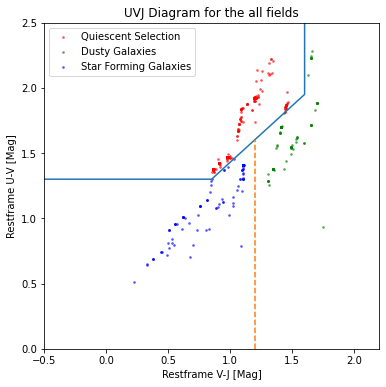

In [128]:
plot_uvj_nocategorise(export_df, export_df['VJ'], export_df['UV'])

# Tto check the veracity of this output, we can recheck

In [129]:
cdfs = export_df[export_df['ID'].str.contains('CDFS_16807')]

In [130]:
cdfs

,ID,UV,VJ,zpk
1,CDFS_16807,0.509884,0.225754,1.5228


In [131]:
# For completness we can read in associated ZFOURGE files and plot them 
zfourge_path = 'datasets/zfourge/'

# Read in ZFourge Data in each field

#CDFS, COSMOS, UDS
cdfs_df = read_zfourge_data('CDFS', zfourge_path)
cosmos_df = read_zfourge_data('COSMOS', zfourge_path)
uds_df = read_zfourge_data('UDS', zfourge_path)

# as a dataframe
cdfs_recalcUVJids = pd.read_csv('datasets/zfourge/CDFS_RecalculatedUVJids_full.csv')
cosomos_recalcUVJids = pd.read_csv('datasets/zfourge/COSMOS_RecalculatedUVJids_full.csv')
uds_recalcUVJids = pd.read_csv('datasets/zfourge/UDS_RecalculatedUVJids_full.csv')


cdfs_recalcUVJids = cdfs_recalcUVJids.rename(columns={'ID':'id'})
cosomos_recalcUVJids = cosomos_recalcUVJids.rename(columns={'ID':'id'})
uds_recalcUVJids = uds_recalcUVJids.rename(columns={'ID':'id'})


c:\Users\Mitchell\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Mitchell\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [132]:
# Merge the recalculated UVJ id's with the original dataframes
cdfs_df = pd.merge(cdfs_df, cdfs_recalcUVJids, on='id')
cosmos_df = pd.merge(cosmos_df, cosomos_recalcUVJids, on='id')
uds_df = pd.merge(uds_df, uds_recalcUVJids, on='id')

In [133]:
# Making one dataframe
frames = [cdfs_df, cosmos_df, uds_df]
zfourge_df = pd.concat(frames)


In [134]:
zfourge_df

,recno,id,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,FH,e_FH,w_FH,FK,e_FK,w_FK,FY,e_FY,w_FY,wminAll
0,5886,CDFS_5886,4903.505,2218.433,53.061234,-27.882744,3,182.0,3.09289,0.10266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5928,CDFS_5928,4865.992,2198.946,53.063004,-27.883558,3,68.0,3.42457,0.10040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5972,CDFS_5972,4686.141,2261.246,53.071480,-27.880964,2,300.0,8.39165,0.08648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6034,CDFS_6034,4700.024,2220.552,53.070828,-27.882660,3,30.0,0.51288,0.09210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6049,CDFS_6049,4693.510,2218.716,53.071133,-27.882736,3,16.0,0.33930,0.09267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,22073,UDS_22073,893.519,4929.281,34.391899,-5.111294,0,58.0,1.03939,0.07892,...,1.99784,0.30258,1.0,2.13933,0.21462,0.77,NaN,NaN,0.0,0.67
6308,22077,UDS_22077,529.058,4942.281,34.407147,-5.110752,3,161.0,3.08937,0.08013,...,5.38064,0.34642,1.0,7.73447,0.23584,0.85,NaN,NaN,0.0,0.65
6309,22078,UDS_22078,982.913,4997.860,34.388161,-5.108436,0,167.0,5.49590,0.08340,...,11.21525,0.33582,1.0,14.09349,0.24023,0.76,NaN,NaN,0.0,0.60
6310,22086,UDS_22086,4080.163,4739.570,34.258579,-5.119182,0,130.0,2.54756,0.06966,...,6.33329,0.34497,1.0,6.28376,0.20835,1.06,NaN,NaN,0.0,0.86


In [135]:
export_df

,ID,UV,VJ,zpk
0,CDFS_22468,0.790783,1.090045,1.6739
1,CDFS_16807,0.509884,0.225754,1.5228
2,CDFS_11281,0.742645,0.450610,1.5864
3,CDFS_10413,0.646226,0.325980,1.5003
4,CDFS_13143,0.646008,0.326934,1.4925
...,...,...,...,...
434,UDS_13883,1.380354,0.863838,0.8058
435,UDS_1887,1.473628,0.972323,0.4364
436,UDS_17475,1.560590,1.375327,1.0974
437,UDS_19012,2.224120,1.325729,0.4129


In [136]:
# Select subset of the zfourge_df where both id's are present
zfourge_df = zfourge_df[zfourge_df['id'].isin(export_df['ID'])]

In [137]:
# # Choose subset with only 1 field
# zfourge_df = zfourge_df[zfourge_df['field'] == 'COSMOS']

# # Likewise for the export_df
# export_df = export_df[export_df['ID'].isin(zfourge_df['id'])]


Number of Quiescent Galaxies: 133
Number of Dusty Galaxies: 67
Number of Star Forming Galaxies: 239


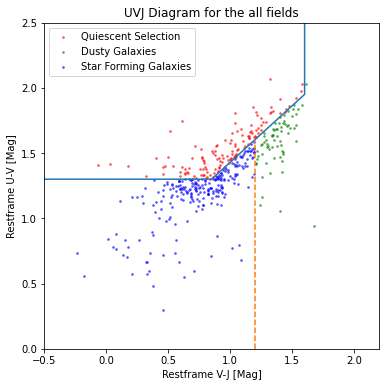

In [138]:
# Plot the UVJ diagram for the ZFOURGE galaxies
plot_uvj_nocategorise(zfourge_df, zfourge_df['VJ'], zfourge_df['UV'])

Number of Quiescent Galaxies: 260
Number of Dusty Galaxies: 81
Number of Star Forming Galaxies: 98


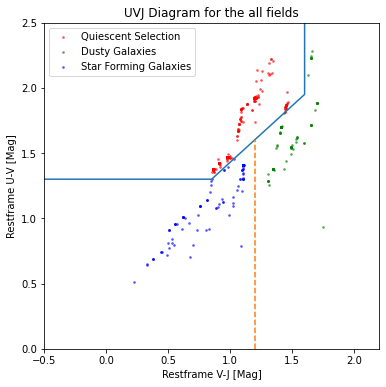

In [139]:
# Plotting this using my quiescent transitions calculated from ollie's data
plot_uvj_nocategorise(export_df, export_df['VJ'], export_df['UV'])

Number of Quiescent Galaxies: 439
Number of Dusty Galaxies: 0
Number of Star Forming Galaxies: 0


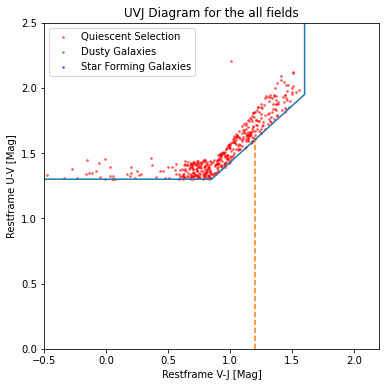

In [140]:
# Now plotting using my original selection of transition ID's
# using the VJ_0 and UV_0 columns
plot_uvj_nocategorise(zfourge_df, zfourge_df['VJ_0'], zfourge_df['UV_0'])

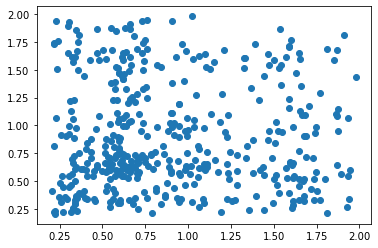

In [141]:
# For completeness plot the redshifts I brought over from my export_df against the ones in the zfourge_df
plt.scatter(zfourge_df['zpk'], export_df['zpk'])
plt.show()

In [142]:
y = zfourge_df[['zpk', 'id']].sort_values(by='id')




In [143]:
x = export_df[['zpk', 'ID']].sort_values(by='ID')


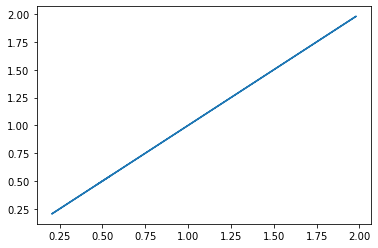

In [144]:
plt.plot(x['zpk'], y['zpk'])    # straight line indicates that all redshifts are matched
plt.show()
# plot the UV entries for each export_df and zfourge_df

# likewise for VJ, all on same graph


In [145]:
export_df

,ID,UV,VJ,zpk
0,CDFS_22468,0.790783,1.090045,1.6739
1,CDFS_16807,0.509884,0.225754,1.5228
2,CDFS_11281,0.742645,0.450610,1.5864
3,CDFS_10413,0.646226,0.325980,1.5003
4,CDFS_13143,0.646008,0.326934,1.4925
...,...,...,...,...
434,UDS_13883,1.380354,0.863838,0.8058
435,UDS_1887,1.473628,0.972323,0.4364
436,UDS_17475,1.560590,1.375327,1.0974
437,UDS_19012,2.224120,1.325729,0.4129


In [146]:
# Save and export this for comparison
# save to outputs
export_df.to_csv('outputs/cigale_colours_ids.csv', index=False)

In [147]:
# See the names of all of the column headings in the df
best_fit_seds[0].columns

Index(['wavelength', 'Fnu', 'L_lambda_total', 'stellar.old', 'stellar.young',
       'nebular.absorption_old', 'nebular.absorption_young',
       'nebular.lines_old', 'nebular.lines_young', 'nebular.continuum_old',
       'nebular.continuum_young', 'attenuation.stellar.old',
       'attenuation.stellar.young', 'attenuation.nebular.lines_old',
       'attenuation.nebular.lines_young', 'attenuation.nebular.continuum_old',
       'attenuation.nebular.continuum_young', 'dust', 'agn.SKIRTOR2016_torus',
       'agn.SKIRTOR2016_polar_dust', 'agn.SKIRTOR2016_disk', 'igm', 'Snu',
       'nuSnu', 'Flambda', 'lambda (Angstroms)',
       'Total Flux (erg/s/cm^2/Angstrom)'],
      dtype='object')

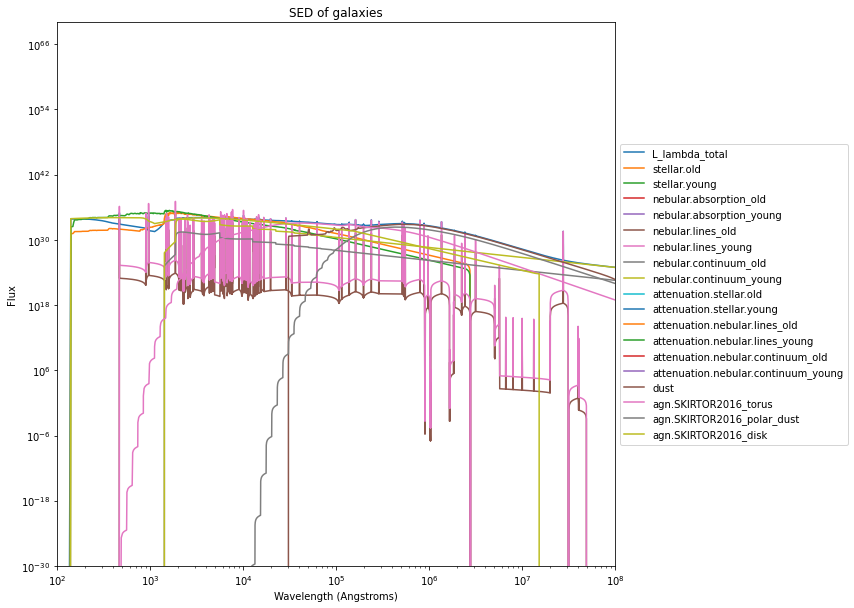

In [148]:
# Now that we have some type of SED output, we can attempt to try to convert the CIGALE decomposed outputs#
# Begin by attempting to plot L_lambda_total in a similar manner to before 
n=0
df = best_fit_seds[n]

# Aside fom the first 3, and the last 4 columns, plot the rest wavelength against the column

# iterate throught the columns, and plot the values
plt.figure(figsize=(10, 10))
for i in range(2, len(df.columns)-6):
    plt.loglog(df['wavelength'], df[df.columns[i]], label=df.columns[i])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim(1e2, 1e8)
plt.ylim(1e-30, 1e70)
plt.title('SED of galaxies')


# Plot the legend off to the side
# Create a legend with the unique labels
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [149]:
# a type 1 AGN would consist of the following components
# - AGN disk
# - maybe AGN polar dust


# Whereas a type 2 would consist of all components in varying quantities
# - AGN disk
# - AGN torus
# - AGN polar dust
# Print the column names

for col in best_fit_seds[0].columns:
    print(col)



wavelength
Fnu
L_lambda_total
stellar.old
stellar.young
nebular.absorption_old
nebular.absorption_young
nebular.lines_old
nebular.lines_young
nebular.continuum_old
nebular.continuum_young
attenuation.stellar.old
attenuation.stellar.young
attenuation.nebular.lines_old
attenuation.nebular.lines_young
attenuation.nebular.continuum_old
attenuation.nebular.continuum_young
dust
agn.SKIRTOR2016_torus
agn.SKIRTOR2016_polar_dust
agn.SKIRTOR2016_disk
igm
Snu
nuSnu
Flambda
lambda (Angstroms)
Total Flux (erg/s/cm^2/Angstrom)


wavelength
Fnu
L_lambda_total
stellar.old
stellar.young
nebular.absorption_old
nebular.absorption_young
nebular.lines_old
nebular.lines_young
nebular.continuum_old
nebular.continuum_young
attenuation.stellar.old
attenuation.stellar.young
attenuation.nebular.lines_old
attenuation.nebular.lines_young
attenuation.nebular.continuum_old
attenuation.nebular.continuum_young
dust
agn.SKIRTOR2016_torus
agn.SKIRTOR2016_polar_dust
agn.SKIRTOR2016_disk
igm
Snu
nuSnu
Flambda
lambda (Angstroms)

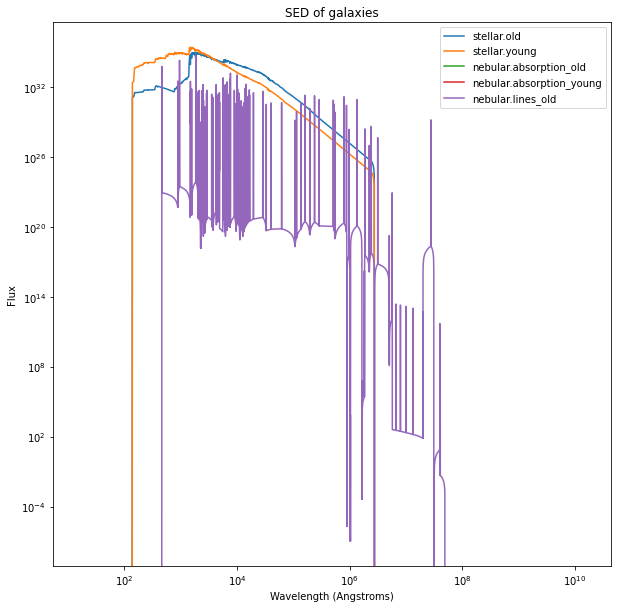

In [150]:
# attempting to plot the new values

# Subsetdf of only agn components


# Plotting only the AGN components
plt.figure(figsize=(10, 10))
for i in range(3, 8):
    plt.loglog(df['wavelength'], df[df.columns[i]], label=df.columns[i])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
#plt.xlim(1e2, 1e8)
#plt.ylim(1e-30, 1e70)
plt.title('SED of galaxies')
plt.legend()
plt.show()



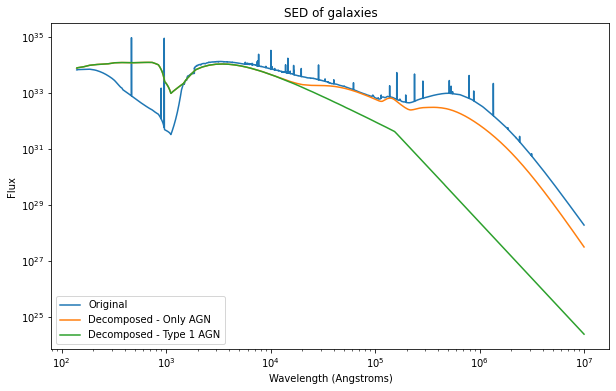

In [151]:
# Plot just the total value of L_lambda_total

# Drop the zero values
new_df = df[df['L_lambda_total'] > 10**-7].copy()

# Create an adjust L_lambda to plot against
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total']


# Remove the young and old stellar components
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['stellar.old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['stellar.young']


# Remove the absopriton and emission lines

# Absorption
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.absorption_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.absorption_young']

# Emission
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.lines_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.lines_young']


# Removing the dust component
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['dust']


# Removing the galactic continuum
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.continuum_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['nebular.continuum_young']

# Removing the attentuated components
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.stellar.old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.stellar.young']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.nebular.lines_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.nebular.lines_young']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.nebular.continuum_old']
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['attenuation.nebular.continuum_young']


# Remove the igm
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['igm']


# To ensure this is done correctly, we also are choosing to consider simply just the AGN components 
# where the the values are within a range of 10^2 - 10^7
new_df = new_df[(new_df['wavelength'] > 10**-2) & (new_df['wavelength'] < 10**7)]



# Optionally we can choose to remove certain parts of the SED, such as the dust component
# the torus component living the disk component for type 1

# Type 1
# Remove the dust component
# agn.SKIRTOR2016_polar_dust
# agn.SKIRTOR2016_disk

# Removing polar dust
new_df['L_lambda_total_decomposed_type_1'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_polar_dust']

# Removing torus
new_df['L_lambda_total_decomposed_type_1'] = new_df['L_lambda_total_decomposed_type_1'] - new_df['agn.SKIRTOR2016_torus']






# normalise the values using the integral of the total flux of the original SED
# We will use the trapezoidal rule to calculate the integral of the total flux
# We will then divide the decomposed values by this integral to normalise the values
integral_total = np.trapz(new_df['L_lambda_total'], new_df['wavelength'])
integral_decomposed = np.trapz(new_df['L_lambda_total_decomposed'], new_df['wavelength'])

# Scaling factor
#scaling_factor = integral_total/integral_decomposed

# Normalise the decomposed values
#new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] * scaling_factor



plt.figure(figsize=(10, 6))
plt.loglog(new_df['wavelength'], new_df['L_lambda_total'], label='Original')
plt.loglog(new_df['wavelength'], new_df['L_lambda_total_decomposed'], label='Decomposed - Only AGN')

# Additionally try to plot the AGN component of a type 1
plt.loglog(new_df['wavelength'], new_df['L_lambda_total_decomposed_type_1'], label='Decomposed - Type 1 AGN')

plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title('SED of galaxies')
plt.legend()
plt.show()


So now that we have seen this we know that we can easily just calculate the the galaxy with the AGN components only. We will therefore like to take a similar approach where we choose to only consider the galaxies galactic components. 
by considering only this, in a more rigiours way we should hopefully be able to see what a 'clean' galaxy looks like. From here, with the decomposed SED we should have two components. An AGN component, and simply a galactic component with no AGN modelled into it.

We would like to subtract the AGN from all of the galaxies, and then replot these galaxies as required in UVJ space. Let us begin by attempting to create a galaxy with only the galactic components and no AGN

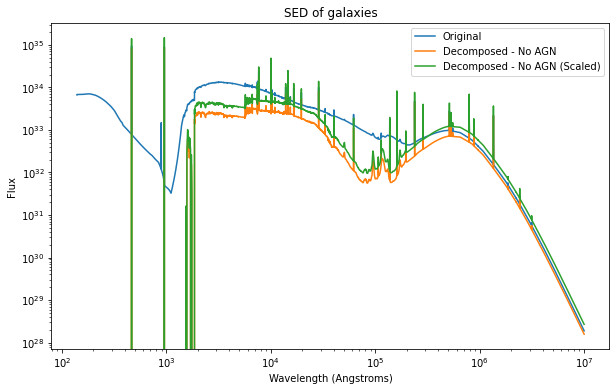

In [152]:
# Drop the zero values
new_df = df[df['L_lambda_total'] > 10**-7].copy()

# Create an adjust L_lambda to plot against
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total']


# To ensure this is done correctly, we also are choosing to consider simply just the AGN components 
# where the the values are within a range of 10^2 - 10^7
new_df = new_df[(new_df['wavelength'] > 10**-2) & (new_df['wavelength'] < 10**7)]



# We would like to remove the AGN from the galaxy if possible

# Removing polar dust
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_polar_dust']

# Removing torus
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_torus']

# Removing the accretion disk
new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_disk']




# normalise the values using the integral of the total flux of the original SED
# We will use the trapezoidal rule to calculate the integral of the total flux
# We will then divide the decomposed values by this integral to normalise the values
integral_total = np.trapz(new_df['L_lambda_total'], new_df['wavelength'])
integral_decomposed = np.trapz(new_df['L_lambda_total_decomposed'], new_df['wavelength'])

# Scaling factor
scaling_factor = integral_total/integral_decomposed

# Normalise the decomposed values <- Unsure if we should be doing this, but for complenetess it may be a good idea
new_df['L_lambda_total_decomposed_Scaled'] = new_df['L_lambda_total_decomposed'] * scaling_factor




plt.figure(figsize=(10, 6))
plt.loglog(new_df['wavelength'], new_df['L_lambda_total'], label='Original')
plt.loglog(new_df['wavelength'], new_df['L_lambda_total_decomposed'], label='Decomposed - No AGN')
plt.loglog(new_df['wavelength'], new_df['L_lambda_total_decomposed_Scaled'], label='Decomposed - No AGN (Scaled)')

plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title('SED of galaxies')
plt.legend()
plt.show()


In [153]:
# Now that we have the general idea of how to decompose the SEDs, we can attempt to do this for all of the galaxies
# in the best_fit_seds list
# We will create a function that will do this for us

def decompose_agn_seds(best_fit_seds):
    # Create a list to store the decomposed SEDs
    decomposed_seds = []
    
    # Iterate through the best_fit_seds
    for i in range(len(best_fit_seds)):
        new_df = best_fit_seds[i].copy()
        
        # Drop the zero values - maybe include this potentially
       # new_df = df[df['L_lambda_total'] > 10**-7].copy()

        # AGN components - Remove the galaxy component
        # Create an adjust L_lambda to plot against
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total']

        # Remove the young and old stellar components
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['stellar.old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['stellar.young']


        # Remove the absopriton and emission lines

        # Absorption
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.absorption_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.absorption_young']

        # Emission
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.lines_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.lines_young']


        # Removing the dust component
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['dust']


        # Removing the galactic continuum
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.continuum_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['nebular.continuum_young']

        # Removing the attentuated components
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.stellar.old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.stellar.young']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.nebular.lines_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.nebular.lines_young']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.nebular.continuum_old']
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['attenuation.nebular.continuum_young']


        # Remove the igm
        new_df['L_lambda_total_decomposed_AGN'] = new_df['L_lambda_total_decomposed_AGN'] - new_df['igm']
        
        integral_total = np.trapz(new_df['L_lambda_total'], new_df['wavelength'])
        integral_decomposed = np.trapz(new_df['L_lambda_total_decomposed_AGN'], new_df['wavelength'])

        # Scaling factor
        scaling_factor = integral_total/integral_decomposed

        # Normalise the decomposed values <- Unsure if we should be doing this, but for complenetess it may be a good idea
        new_df['L_lambda_total_decomposed_AGN_Scaled'] = new_df['L_lambda_total_decomposed_AGN'] * scaling_factor
        
        

        # Galaxy component - Remove the AGN Component
        # Create an adjust L_lambda to plot against
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total']

        # To ensure this is done correctly, we also are choosing to consider simply just the AGN components 
        # where the the values are within a range of 10^2 - 10^7
        new_df = new_df[(new_df['wavelength'] > 10**-2) & (new_df['wavelength'] < 10**7)]

        # We would like to remove the AGN from the galaxy if possible

        # Removing polar dust
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_polar_dust']

        # Removing torus
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_torus']

        # Removing the accretion disk
        new_df['L_lambda_total_decomposed'] = new_df['L_lambda_total_decomposed'] - new_df['agn.SKIRTOR2016_disk']

        # normalise the values using the integral of the total flux of the original SED
        # We will use the trapezoidal rule to calculate the integral of the total flux
        # We will then divide the decomposed values by this integral to normalise the values
        integral_total = np.trapz(new_df['L_lambda_total'], new_df['wavelength'])
        integral_decomposed = np.trapz(new_df['L_lambda_total_decomposed'], new_df['wavelength'])

        # Scaling factor
        scaling_factor = integral_total/integral_decomposed

        # Normalise the decomposed values <- Unsure if we should be doing this, but for complenetess it may be a good idea
        new_df['L_lambda_total_decomposed_Scaled'] = new_df['L_lambda_total_decomposed'] * scaling_factor
        
        decomposed_seds.append(new_df)
        
    return decomposed_seds 



    

In [154]:
decomposed_seds = decompose_agn_seds(best_fit_seds)

In [155]:
decomposed_seds[0]

,wavelength,Fnu,L_lambda_total,stellar.old,stellar.young,nebular.absorption_old,nebular.absorption_young,nebular.lines_old,nebular.lines_young,nebular.continuum_old,...,igm,Snu,nuSnu,Flambda,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom),L_lambda_total_decomposed_AGN,L_lambda_total_decomposed_AGN_Scaled,L_lambda_total_decomposed,L_lambda_total_decomposed_Scaled
0,1.529788e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.0,0.000000,0.000000,0.000000e+00,1.529788e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.756432e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.0,0.000000,0.000000,0.000000e+00,1.756432e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2.016653e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.0,0.000000,0.000000,0.000000e+00,2.016653e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2.315428e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.0,0.000000,0.000000,0.000000e+00,2.315428e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2.658467e+01,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.0,0.000000,0.000000,0.000000e+00,2.658467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,9.944754e+06,0.005204,1.918748e+28,0.0,0.0,0.0,0.0,1.517128e+13,3.648104e+15,2.462445e+24,...,0.0,0.000002,587091.269782,5.903527e-25,9.944754e+06,5.903527e-25,3.165298e+27,7.690941e+27,1.602218e+28,2.724804e+28
3457,9.952217e+06,0.005192,1.911533e+28,0.0,0.0,0.0,0.0,3.189368e+12,7.669195e+14,2.459095e+24,...,0.0,0.000002,585322.530767,5.881328e-25,9.952217e+06,5.881328e-25,3.152736e+27,7.660419e+27,1.596259e+28,2.714670e+28
3458,9.959681e+06,0.005180,1.904317e+28,0.0,0.0,0.0,0.0,2.963140e+10,7.125204e+12,2.455746e+24,...,0.0,0.000002,583550.477898,5.859128e-25,9.959681e+06,5.859128e-25,3.140174e+27,7.629897e+27,1.590300e+28,2.704536e+28
3459,9.967145e+06,0.005168,1.897102e+28,0.0,0.0,0.0,0.0,1.216647e+07,2.925566e+09,2.452397e+24,...,0.0,0.000002,581775.111176,5.836928e-25,9.967145e+06,5.836928e-25,3.127613e+27,7.599375e+27,1.584341e+28,2.694401e+28


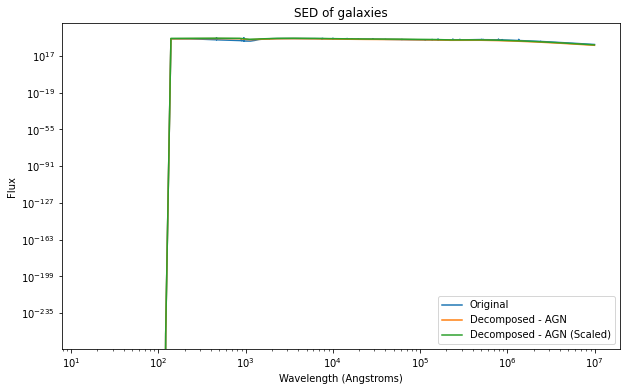

In [156]:
# plotting the first decomposed SED
plt.figure(figsize=(10, 6))



# original sed
plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total'], label='Original')

# Decomposed SED - Galaxy Components 
#plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total_decomposed'], label='Decomposed - No AGN')
#plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total_decomposed_Scaled'], label='Decomposed - No AGN (Scaled)')

# Decomposed SED - AGN Components
plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total_decomposed_AGN'], label='Decomposed - AGN')
plt.loglog(decomposed_seds[0]['wavelength'], decomposed_seds[0]['L_lambda_total_decomposed_AGN_Scaled'], label='Decomposed - AGN (Scaled)')



plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title('SED of galaxies')



plt.legend()
plt.show()


In [157]:
# Finally we can plot our original uvj diagram with l_lambda to see the uvj results
# Doing a quick plot of the original UVJ colour space using the undecomposed SED
uv_galaxy_colours = []
vj_galaxy_colours = []
uv_full_colours = []
vj_full_colours = []

for sed_data in decomposed_seds:
    
    # Create an SED object using astSED - for the decomposed galaxy component
    wl = sed_data['lambda (Angstroms)']
    fl = sed_data['L_lambda_total_decomposed']
    sed = astSED.SED(wavelength=wl, flux=fl, z=0.0)    
    
    # create the uv and vj colours
    uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
    vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
    
    # Append colours to list
    uv_galaxy_colours.append(uv)
    vj_galaxy_colours.append(vj)
    
    # Create an SED object using astSED - for full colours 
    wl = sed_data['lambda (Angstroms)']
    fl = sed_data['L_lambda_total']
    sed = astSED.SED(wavelength=wl, flux=fl, z=0.0)    
    
    # create the uv and vj colours
    uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
    vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
    
    # Append colours to list
    uv_full_colours.append(uv)
    vj_full_colours.append(vj)



In [158]:
uv_galaxy_colours

[0.9706202652401856,
 0.5098839644323476,
 0.7425039824902058,
 0.6459387116828452,
 0.6459387116828168,
 0.7425039824902058,
 0.9131742119787987,
 0.8123977330138814,
 0.9131742119787987,
 0.7425039824902058,
 0.6891869033142939,
 0.9559972620606061,
 0.9559972620606061,
 0.6891869033142939,
 0.9559972620606061,
 0.6891869033142939,
 0.9559972620606061,
 1.0088359492431636,
 0.7022743751034426,
 1.0760755343851542,
 1.0235270968607608,
 1.1062975179279562,
 1.0088359492431493,
 2.1394784074620787,
 1.0901791516627384,
 1.0088359492431493,
 1.0088359492431493,
 1.3803541573013263,
 1.8349121454429849,
 1.8698824276508077,
 1.4107443449543666,
 1.9714731826119447,
 1.3803541573013263,
 1.3803541573013405,
 1.473732715364065,
 1.4107443449543666,
 1.8838266064824296,
 1.4107443449543666,
 1.3803541573013405,
 1.3803541573013263,
 1.3806436088702299,
 1.3803541573013405,
 1.4672599967741462,
 1.1465123358699714,
 1.4107443449543666,
 1.3803541573013263,
 1.4107443449543666,
 1.42210678318

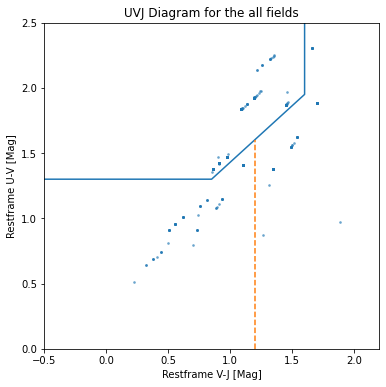

In [159]:
# Plotting this in UVJ
plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0



# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)





# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]
# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='All Galaxies')

# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.show()

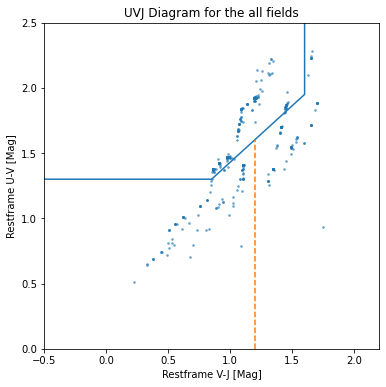

In [160]:
# Check for both sets of colours



plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0



# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)





# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]
# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='All Galaxies')

# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.show()

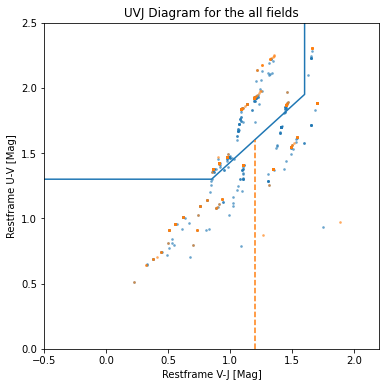

In [161]:
# PLot the other one without limits
# Plotting this in UVJ
plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0


# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)





# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]
# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='All Galaxies')

plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='AGN Galaxies')

# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.show()

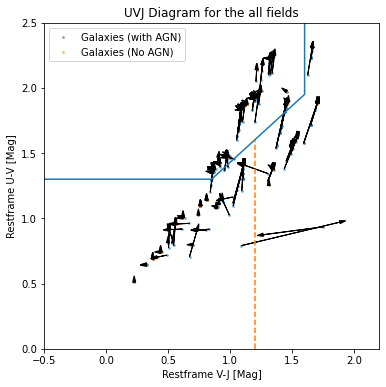

In [162]:
# We would like to draw an arrow for each entry, and see where the arrow is pointing
# we would like the arrow to go from the full galaxy to the decomposed galaxy i.e full colours to galaxy only colours

# we will use the two sets of uvj colours to plot the arrows
# then plotting on a uvj diagram
# Plotting this in UVJ
plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0


# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)





# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]
# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='Galaxies (with AGN)')

plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='Galaxies (No AGN)')


# Adding an arrow from the full galaxy to the decomposed galaxy
for i in range(len(vj_full_colours)): 
    plt.arrow(vj_full_colours[i], uv_full_colours[i], vj_galaxy_colours[i] - vj_full_colours[i], uv_galaxy_colours[i] - uv_full_colours[i], head_width=0.025, head_length=0.05, fc='k', ec='k')


# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.legend()
plt.show()

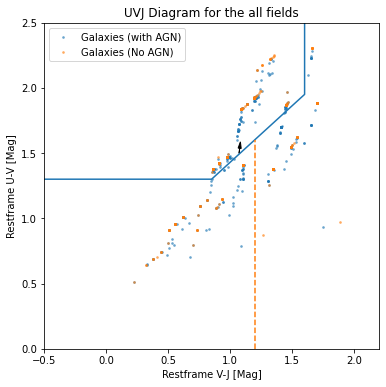

In [163]:
plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0


# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)





# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]
# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours, uv_full_colours, s=3, alpha=0.5, label='Galaxies (with AGN)')

plt.scatter(vj_galaxy_colours, uv_galaxy_colours, s=3, alpha=0.5, label='Galaxies (No AGN)')


# Instead of plotting all arrows, define an average arrow 
# we want to get the average location of each set of points, and plot the transition

# Get the average location of each set of points
avg_vj_full = np.mean(vj_full_colours)
avg_uv_full = np.mean(uv_full_colours)

avg_vj_galaxy = np.mean(vj_galaxy_colours)
avg_uv_galaxy = np.mean(uv_galaxy_colours)

# Plot the average arrow
plt.arrow(avg_vj_full, avg_uv_full, avg_vj_galaxy - avg_vj_full, avg_uv_galaxy - avg_uv_full, head_width=0.025, head_length=0.05, fc='k', ec='k')



# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.legend()
plt.show()

In [164]:
# we want to know what the average arrow size is, that is the average transition from full agn+galaxy to just galaxy
# in this sense we would like to calculate the vector from every galaxy to every decomposed galaxy
# then get simply the magnitude of that change, and average it

# we will use the two sets of UVJ colours to find this
sum_total = 0
no_agn_index = []
for i in range(len(vj_full_colours)): 
    #print(np.sqrt((vj_full_colours[i] - vj_galaxy_colours[i])**2 + (uv_full_colours[i] - uv_galaxy_colours[i])**2)) # get the magnitude of the vector
    
    # If no change occurs we assume that there was no AGN present as the colours should change
    # remove the zero values
    if np.sqrt((vj_full_colours[i] - vj_galaxy_colours[i])**2 + (uv_full_colours[i] - uv_galaxy_colours[i])**2) == 0:
        print(i)
        print('No AGN present')
        
        sum_total+=1
        
        # append the index 
        no_agn_index.append(i)
        # 
        
print("There are exactly {} galaxies where no AGN is present (assumed from no change in UVJ colour)".format(sum_total))

# Removing the values where no AGN is present
vj_full_colours_corrected = np.delete(vj_full_colours, no_agn_index)
uv_full_colours_corrected = np.delete(uv_full_colours, no_agn_index)
vj_galaxy_colours_corrected = np.delete(vj_galaxy_colours, no_agn_index)
uv_galaxy_colours_corrected = np.delete(uv_galaxy_colours, no_agn_index)
gal_names_corrected = np.delete(names, no_agn_index)

# Similarly we are dealing with the decomposed SEDs, which can be identified by an index value in names
# we would like to remove these values as well




1
No AGN present
5
No AGN present
7
No AGN present
9
No AGN present
10
No AGN present
11
No AGN present
13
No AGN present
14
No AGN present
15
No AGN present
16
No AGN present
19
No AGN present
20
No AGN present
21
No AGN present
23
No AGN present
32
No AGN present
33
No AGN present
36
No AGN present
38
No AGN present
40
No AGN present
43
No AGN present
44
No AGN present
45
No AGN present
46
No AGN present
51
No AGN present
54
No AGN present
57
No AGN present
58
No AGN present
61
No AGN present
62
No AGN present
63
No AGN present
66
No AGN present
69
No AGN present
70
No AGN present
71
No AGN present
72
No AGN present
75
No AGN present
78
No AGN present
79
No AGN present
81
No AGN present
82
No AGN present
83
No AGN present
88
No AGN present
89
No AGN present
92
No AGN present
93
No AGN present
94
No AGN present
97
No AGN present
98
No AGN present
100
No AGN present
102
No AGN present
103
No AGN present
104
No AGN present
105
No AGN present
106
No AGN present
109
No AGN present
110
No 

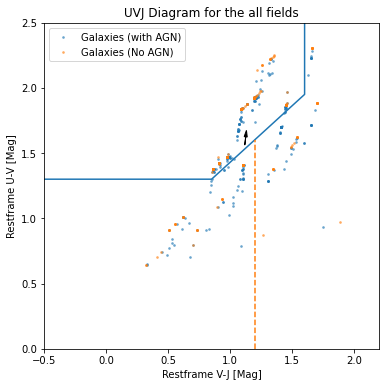

In [165]:
# We now plot our corrected UVJ where the AGN is present, and subsequently removed
plt.figure(figsize=(6, 6))

xmax = 2.2
ymax = 2.5
xmin = -0.5
ymin = 0


# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)





# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]
# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# as all the points have associated names, plot the names
#for i, txt in enumerate(df['ID']):
#    plt.annotate(txt, (x[i], y[i]))
    
# plot the points
plt.scatter(vj_full_colours_corrected, uv_full_colours_corrected, s=3, alpha=0.5, label='Galaxies (with AGN)')

plt.scatter(vj_galaxy_colours_corrected, uv_galaxy_colours_corrected, s=3, alpha=0.5, label='Galaxies (No AGN)')


# Instead of plotting all arrows, define an average arrow 
# we want to get the average location of each set of points, and plot the transition

# Get the average location of each set of points
avg_vj_full = np.mean(vj_full_colours_corrected)
avg_uv_full = np.mean(uv_full_colours_corrected)

avg_vj_galaxy = np.mean(vj_galaxy_colours_corrected)
avg_uv_galaxy = np.mean(uv_galaxy_colours_corrected)

# Plot the average arrow
plt.arrow(avg_vj_full, avg_uv_full, avg_vj_galaxy - avg_vj_full, avg_uv_galaxy - avg_uv_full, head_width=0.025, head_length=0.05, fc='k', ec='k')



# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the all fields')
plt.legend()
plt.show()

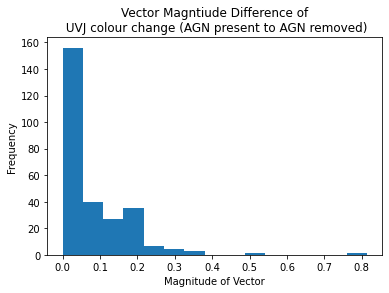

In [166]:

# Count the number of entries
len(vj_full_colours_corrected)

# Histogram of vector distance moved
plt.hist(np.sqrt((vj_full_colours_corrected - vj_galaxy_colours_corrected)**2 + (uv_full_colours_corrected - uv_galaxy_colours_corrected)**2), bins=15)
plt.title("Vector Magntiude Difference of\n UVJ colour change (AGN present to AGN removed)")
plt.xlabel("Magnitude of Vector")
plt.ylabel("Frequency")
plt.show()

In [167]:
# Now we can recalculate the the vector differences for each of the elements
sum_total = 0
distance_moved_threshold = 0
for i in range(len(vj_full_colours_corrected)): 
    # Print only the galaxies where the distance is greater than 0.2
    if((np.sqrt((vj_full_colours_corrected[i] - vj_galaxy_colours_corrected[i])**2 + (uv_full_colours_corrected[i] - uv_galaxy_colours_corrected[i])**2)) > distance_moved_threshold):
        print("Name of galaxy: {}".format(gal_names_corrected[i]))
        print(np.sqrt((vj_full_colours_corrected[i] - vj_galaxy_colours_corrected[i])**2 + (uv_full_colours_corrected[i] - uv_galaxy_colours_corrected[i])**2)) # get the magnitude of the vector  
        sum_total+=1
print("There are exactly {} galaxies where the distance moved is greater than {}".format(sum_total, distance_moved_threshold))

Name of galaxy: CDFS_22468
0.8136625535917694
Name of galaxy: CDFS_11281
0.012049764003173298
Name of galaxy: CDFS_10413
0.0019575396133523744
Name of galaxy: CDFS_13143
0.002891465461377739
Name of galaxy: CDFS_11857
0.10512918214526495
Name of galaxy: CDFS_25717
0.005846470509737074
Name of galaxy: CDFS_18441
0.11265293796859198
Name of galaxy: CDFS_13106
0.001790870438217969
Name of galaxy: CDFS_15163
0.08001298136777461
Name of galaxy: CDFS_19584
0.001609720784743688
Name of galaxy: CDFS_17417
0.004964543653279667
Name of galaxy: CDFS_18838
0.012340789830146782
Name of galaxy: CDFS_10114
0.0016097207847549637
Name of galaxy: CDFS_18797
0.001545465645132607
Name of galaxy: CDFS_29552
0.004969278197625864
Name of galaxy: CDFS_25294
0.17727625074747386
Name of galaxy: CDFS_20666
0.3248329759366964
Name of galaxy: CDFS_28340
0.0005138486367440912
Name of galaxy: CDFS_26267
0.044075072170809464
Name of galaxy: CDFS_12331
0.019992227622973677
Name of galaxy: CDFS_26038
0.0381272042982625

In [168]:
# To extend our idea as before we aim to classify the quiescent moving fraction. Thus we expect the quiescent galaxies to move a certain amount
# thus we will choose to exclude oterh sets of galaxies

# First we will put our galaxy with its UV, and VJ colours (both with and without)
# into a dataframe with its id. 
# Note: We are looking at only the UVJ colours where the AGN is present, and subsequently removed i.e distance moved is greater than 0

# use Gal names to get the ID
# Create a dataframe
decomposed_uvj_df = pd.DataFrame()
decomposed_uvj_df['id'] = gal_names_corrected
decomposed_uvj_df['VJ_withAGN'] = vj_full_colours_corrected
decomposed_uvj_df['UV_withAGN'] = uv_full_colours_corrected
decomposed_uvj_df['VJ_withoutAGN'] = vj_galaxy_colours_corrected
decomposed_uvj_df['UV_withoutAGN'] = uv_galaxy_colours_corrected


In [169]:
# Using our classification code
def categorise_uvj(df, x, y, alpha=None):
    #x = df['mag_V'] - df['mag_J'] # VJ Colours 
    #y = df['mag_U'] - df['mag_V'] # UV Colours

    # Plot the UVJ diagram
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)
    
    
    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))
    
    
    
    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)
    
    

    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later
    

    # Mark dusty, and star-forming galaxies
    if alpha == None:
        df.loc[dusty_condition, f'GalaxyType'] = 2
        df.loc[star_forming_condition, f'GalaxyType'] = 1
        selected_ids = selected_df['id']
        df.loc[df['id'].isin(selected_ids), f'GalaxyType'] = 0
    else:     
        df.loc[dusty_condition, f'GalaxyType_{int(alpha*100)}'] = 2
        df.loc[star_forming_condition, f'GalaxyType_{int(alpha*100)}'] = 1
        selected_ids = selected_df['id']
        df.loc[df['id'].isin(selected_ids), f'GalaxyType_{int(alpha*100)}'] = 0

    #print(selected_df)
    #print(unselected_df)
    
    # Now we can easily select the quiescent galaxies and set the galaxy type to quiescent - 0 or starforming 1.
    #print(selected_df)
     # This is what makes the selection happen
    
    
    
    # Try do the same for the unselected galaxies, noting that the unselected galaxies with x and y > 1.2 are dusty galaxies, and the rest are star-forming galaxies
    #unselected_ids = unselected_df['id']
    
    
    
    
    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]
    
    
    #print(non_quiescent_points[0][0])
    
    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the ZFourge Fields')
    plt.legend()
    plt.show()
    return df



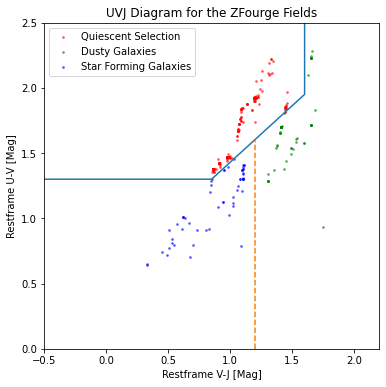

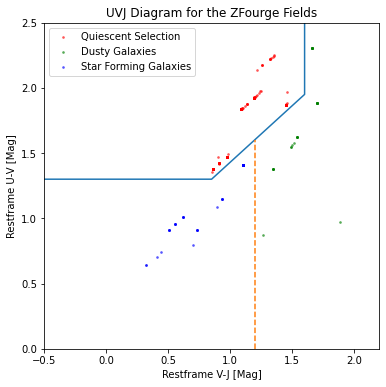

In [170]:
# We would like to create a classification system for the galaxies
# i.e quiescent, star-forming, dusty, etc
decomposed_uvj_df = categorise_uvj(decomposed_uvj_df, decomposed_uvj_df['VJ_withAGN'], decomposed_uvj_df['UV_withAGN'])
decomposed_uvj_df = categorise_uvj(decomposed_uvj_df, decomposed_uvj_df['VJ_withoutAGN'], decomposed_uvj_df['UV_withoutAGN'], 1)

# Rename the second GalaxyType from GalaxyType100 to GalaxyType_NoAGN
decomposed_uvj_df.rename(columns={'GalaxyType_100': 'GalaxyType_NoAGN'}, inplace=True)

In [171]:
decomposed_uvj_df

,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN
0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0
1,CDFS_11281,0.450610,0.742645,0.438561,0.742504,1.0,1.0
2,CDFS_10413,0.325980,0.646226,0.324044,0.645939,1.0,1.0
3,CDFS_13143,0.326934,0.646008,0.324044,0.645939,1.0,1.0
4,CDFS_11857,0.613108,0.918184,0.508098,0.913174,1.0,1.0
...,...,...,...,...,...,...,...
269,UDS_16794,1.192333,1.923505,1.192023,1.923775,0.0,0.0
270,UDS_1887,0.972323,1.473628,0.971983,1.473733,0.0,0.0
271,UDS_17475,1.375327,1.560590,1.448004,1.869882,2.0,0.0
272,UDS_19012,1.325729,2.224120,1.318608,2.224884,0.0,0.0


In [172]:
# Plot the distribution of galaxies that moved (Galaxy Type isn't equal)
# Count the number of galaxies that have moved

# Check if the galaxy type has changed
decomposed_uvj_df['GalaxyType_Changed'] = decomposed_uvj_df['GalaxyType'] != decomposed_uvj_df['GalaxyType_NoAGN']

# if it is not the same between columns, mark as changed
decomposed_uvj_df['GalaxyType_Changed'] = decomposed_uvj_df['GalaxyType_Changed'].astype(int)



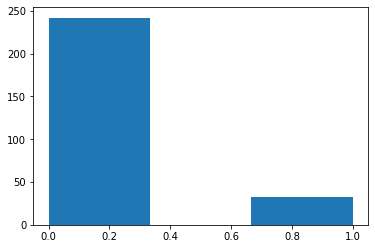

In [173]:
decomposed_uvj_df

# PLot the distribution of changes
plt.hist(decomposed_uvj_df['GalaxyType_Changed'], bins=3)
plt.show()

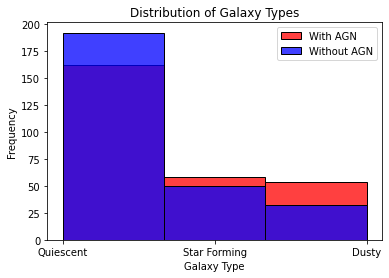

In [174]:
# We would now like to plot the histrograms of the different types.

decomposed_uvj_df


# Using seaborn

# Plot the distribution of galaxies in eah type
sns.histplot(decomposed_uvj_df['GalaxyType'], bins=3, color='r', label='With AGN')
sns.histplot(decomposed_uvj_df['GalaxyType_NoAGN'], bins=3, color='b', label='Without AGN')
plt.xlabel('Galaxy Type')
plt.ylabel('Frequency')
plt.title('Distribution of Galaxy Types')
# change the name of the x axis to each galaxy type: 0 for quiescent, 1 for star-forming, 2 for dusty
plt.xticks([0, 1, 2], ['Quiescent', 'Star Forming', 'Dusty'])


plt.legend()
plt.show()



In [175]:
# Next steps

# 1.A next step may involve quantifying by how much did these move and comparing this movement against the AGN addition metric we developed using the template sets, and ZFOURGE data from before.

# Start by selecting a subset of the data, we will just check on galaxies that after the AGN was removed are classified as quiescent

# Select the subset of the data
galaxy_subset = decomposed_uvj_df


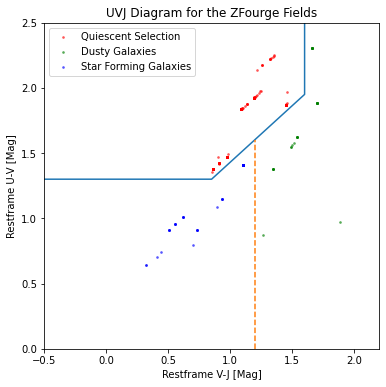

,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN,GalaxyType_Changed,GalaxyType_100
0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0,1,2.0
1,CDFS_11281,0.450610,0.742645,0.438561,0.742504,1.0,1.0,0,1.0
2,CDFS_10413,0.325980,0.646226,0.324044,0.645939,1.0,1.0,0,1.0
3,CDFS_13143,0.326934,0.646008,0.324044,0.645939,1.0,1.0,0,1.0
4,CDFS_11857,0.613108,0.918184,0.508098,0.913174,1.0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
269,UDS_16794,1.192333,1.923505,1.192023,1.923775,0.0,0.0,0,0.0
270,UDS_1887,0.972323,1.473628,0.971983,1.473733,0.0,0.0,0,0.0
271,UDS_17475,1.375327,1.560590,1.448004,1.869882,2.0,0.0,1,0.0
272,UDS_19012,1.325729,2.224120,1.318608,2.224884,0.0,0.0,0,0.0


In [176]:
# Cehck the size of the subset
len(galaxy_subset) # Of the decomposed 


# This is a reasonable enough subset to investigate. Plot the subset
categorise_uvj(galaxy_subset, galaxy_subset['VJ_withoutAGN'], galaxy_subset['UV_withoutAGN'], 1)

In [177]:
# Knowing this we can then plot the average distance moved by the quiescent galaxies from (full to non-agn)

# Create a metric. The distance from VJ, UV with AGN to VJ, UV without AGN
distance = np.sqrt((galaxy_subset['VJ_withAGN'] - galaxy_subset['VJ_withoutAGN'])**2 + (galaxy_subset['UV_withAGN'] - galaxy_subset['UV_withoutAGN'])**2)

# direction - we want the direction from VJ, UV with AGN pointing to VJ, UV without AGN - this is the direction of the arrow with the distance specified above
# calculate the direction
direction = np.arctan2(galaxy_subset['UV_withoutAGN'] - galaxy_subset['UV_withAGN'], galaxy_subset['VJ_withoutAGN'] - galaxy_subset['VJ_withAGN'])

In [178]:
galaxy_subset['vector_magnitude'] = distance
galaxy_subset['vector_direction'] = direction

In [179]:
galaxy_subset

,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN,GalaxyType_Changed,GalaxyType_100,vector_magnitude,vector_direction
0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0,1,2.0,0.813663,0.222862
1,CDFS_11281,0.450610,0.742645,0.438561,0.742504,1.0,1.0,0,1.0,0.012050,-3.129894
2,CDFS_10413,0.325980,0.646226,0.324044,0.645939,1.0,1.0,0,1.0,0.001958,-2.994132
3,CDFS_13143,0.326934,0.646008,0.324044,0.645939,1.0,1.0,0,1.0,0.002891,-3.117469
4,CDFS_11857,0.613108,0.918184,0.508098,0.913174,1.0,1.0,0,1.0,0.105129,-3.093922
...,...,...,...,...,...,...,...,...,...,...,...
269,UDS_16794,1.192333,1.923505,1.192023,1.923775,0.0,0.0,0,0.0,0.000411,2.423755
270,UDS_1887,0.972323,1.473628,0.971983,1.473733,0.0,0.0,0,0.0,0.000355,2.842348
271,UDS_17475,1.375327,1.560590,1.448004,1.869882,2.0,0.0,1,0.0,0.317717,1.340005
272,UDS_19012,1.325729,2.224120,1.318608,2.224884,0.0,0.0,0,0.0,0.007162,3.034757


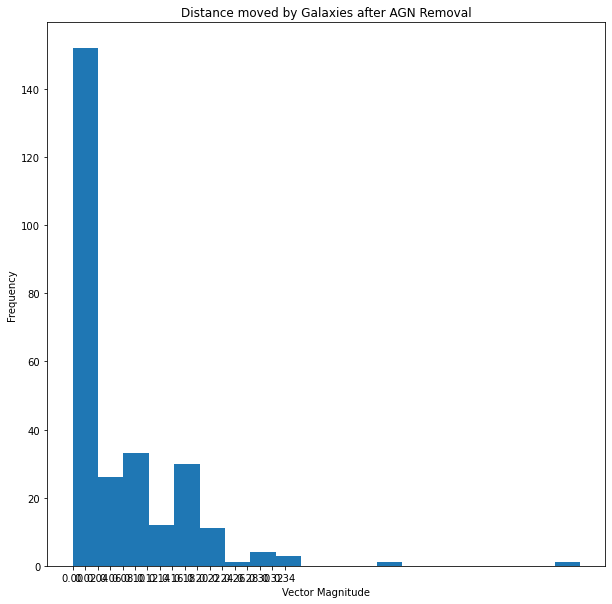

In [180]:
# plot the vector magnitude
plt.figure(figsize=(10, 10))
plt.hist(galaxy_subset['vector_magnitude'], bins=20)
plt.xticks(np.arange(0, 0.35, 0.02))
plt.title('Distance moved by Galaxies after AGN Removal')
plt.xlabel('Vector Magnitude')
plt.ylabel('Frequency')
plt.show()

In [181]:
# Futher reduce the fraction by limiting an AGN fraction of less than 0.02
# Select the subset of the data
galaxy_subset = galaxy_subset[galaxy_subset['vector_magnitude'] > 0.02]


In [182]:
galaxy_subset

,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN,GalaxyType_Changed,GalaxyType_100,vector_magnitude,vector_direction
0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0,1,2.0,0.813663,0.222862
4,CDFS_11857,0.613108,0.918184,0.508098,0.913174,1.0,1.0,0,1.0,0.105129,-3.093922
6,CDFS_18441,0.670256,0.961630,0.557744,0.955997,1.0,1.0,0,1.0,0.112653,-3.091572
8,CDFS_15163,0.487994,0.717532,0.409449,0.702274,1.0,1.0,0,1.0,0.080013,-2.949730
15,CDFS_25294,1.410461,1.696627,1.448004,1.869882,2.0,0.0,1,0.0,0.177276,1.357402
...,...,...,...,...,...,...,...,...,...,...,...
263,UDS_7946,1.065337,1.685944,1.085887,1.834912,0.0,0.0,0,0.0,0.150379,1.433713
266,UDS_15368,1.439351,1.815656,1.448004,1.869882,0.0,0.0,0,0.0,0.054912,1.412557
267,UDS_15080,1.223027,1.926246,1.192023,1.923775,0.0,0.0,0,0.0,0.031102,-3.062079
268,UDS_9060,1.065288,1.685613,1.085887,1.834912,0.0,0.0,0,0.0,0.150714,1.433689


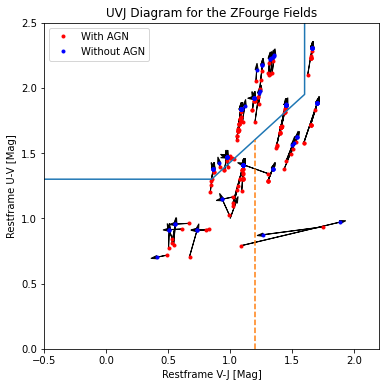

In [183]:
# Plotting the UVJ diagram with the vector magnitude arrows 
# Set the plotting limits
plt.figure(figsize=(6, 6))

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


# Plotting our with AGN points, and without
plt.plot(galaxy_subset['VJ_withAGN'], galaxy_subset['UV_withAGN'], 'r.', label='With AGN')
plt.plot(galaxy_subset['VJ_withoutAGN'], galaxy_subset['UV_withoutAGN'], 'b.', label='Without AGN')



# Somewhere on the graph plot the average arrow
# average arrow
average_distance = np.mean(galaxy_subset['vector_magnitude'])

# average direction
average_direction = np.mean(galaxy_subset['vector_direction'])

# plot an arrow on the graph at some point 
plt.arrow(1, 1, average_distance*np.cos(average_direction), average_distance*np.sin(average_direction), head_width=0.025, head_length=0.05, fc='k', ec='k')


# plot all distance and direction arrow for all points
for i in range(len(galaxy_subset)):
    plt.arrow(galaxy_subset['VJ_withAGN'].iloc[i], galaxy_subset['UV_withAGN'].iloc[i], galaxy_subset['vector_magnitude'].iloc[i]*np.cos(galaxy_subset['vector_direction'].iloc[i]), galaxy_subset['vector_magnitude'].iloc[i]*np.sin(galaxy_subset['vector_direction'].iloc[i]), head_width=0.025, head_length=0.05, fc='k', ec='k')


# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]

# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]



plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the ZFourge Fields')
plt.legend()
plt.show()

In [184]:
# Previously we compared the amount of AGN added to any galaxy, and how far it moved given a particular percentage of AGN added
# We would like to compare this to the distance moved by the quiescent galaxies and try to backtrack and determine the percentage of AGN
# based on the distance it moved in UVJ colourspace.


In [185]:
# Select a subset again of our subset and investigsate the individual contributions
# Select the subset of the data
galaxy_subset

,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN,GalaxyType_Changed,GalaxyType_100,vector_magnitude,vector_direction
0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0,1,2.0,0.813663,0.222862
4,CDFS_11857,0.613108,0.918184,0.508098,0.913174,1.0,1.0,0,1.0,0.105129,-3.093922
6,CDFS_18441,0.670256,0.961630,0.557744,0.955997,1.0,1.0,0,1.0,0.112653,-3.091572
8,CDFS_15163,0.487994,0.717532,0.409449,0.702274,1.0,1.0,0,1.0,0.080013,-2.949730
15,CDFS_25294,1.410461,1.696627,1.448004,1.869882,2.0,0.0,1,0.0,0.177276,1.357402
...,...,...,...,...,...,...,...,...,...,...,...
263,UDS_7946,1.065337,1.685944,1.085887,1.834912,0.0,0.0,0,0.0,0.150379,1.433713
266,UDS_15368,1.439351,1.815656,1.448004,1.869882,0.0,0.0,0,0.0,0.054912,1.412557
267,UDS_15080,1.223027,1.926246,1.192023,1.923775,0.0,0.0,0,0.0,0.031102,-3.062079
268,UDS_9060,1.065288,1.685613,1.085887,1.834912,0.0,0.0,0,0.0,0.150714,1.433689


In [186]:
# output the data to a csv file, adding a new column that adds a field column by splitting the id into field + number
galaxy_subset['field'] = galaxy_subset['id'].str.split('_').str[0].copy()

<ipython-input-186-25e8768d3d44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxy_subset['field'] = galaxy_subset['id'].str.split('_').str[0].copy()


In [187]:
galaxy_subset

,id,VJ_withAGN,UV_withAGN,VJ_withoutAGN,UV_withoutAGN,GalaxyType,GalaxyType_NoAGN,GalaxyType_Changed,GalaxyType_100,vector_magnitude,vector_direction,field
0,CDFS_22468,1.090045,0.790783,1.883585,0.970620,1.0,2.0,1,2.0,0.813663,0.222862,CDFS
4,CDFS_11857,0.613108,0.918184,0.508098,0.913174,1.0,1.0,0,1.0,0.105129,-3.093922,CDFS
6,CDFS_18441,0.670256,0.961630,0.557744,0.955997,1.0,1.0,0,1.0,0.112653,-3.091572,CDFS
8,CDFS_15163,0.487994,0.717532,0.409449,0.702274,1.0,1.0,0,1.0,0.080013,-2.949730,CDFS
15,CDFS_25294,1.410461,1.696627,1.448004,1.869882,2.0,0.0,1,0.0,0.177276,1.357402,CDFS
...,...,...,...,...,...,...,...,...,...,...,...,...
263,UDS_7946,1.065337,1.685944,1.085887,1.834912,0.0,0.0,0,0.0,0.150379,1.433713,UDS
266,UDS_15368,1.439351,1.815656,1.448004,1.869882,0.0,0.0,0,0.0,0.054912,1.412557,UDS
267,UDS_15080,1.223027,1.926246,1.192023,1.923775,0.0,0.0,0,0.0,0.031102,-3.062079,UDS
268,UDS_9060,1.065288,1.685613,1.085887,1.834912,0.0,0.0,0,0.0,0.150714,1.433689,UDS


In [188]:
# Save
galaxy_subset.to_csv('Decomposed_UVJ_Ids.csv')